# Evaluating College Students' Return on Investment
> ### Team Name: Data Daemon Team
> ### Team: Lauren Fraser, Gabriela Meza, Michael Pettit, Dean Romano, Rodney Small
> ### Tufts Gordon Institute, EM-0206 Data Science, Spring 2021


----
## Execute Summary
<!--
``` 
10 PTS
● Describe the project problem statement. Your project idea should be clear
● How will the problem be tackled and solved?
● What are the parameters around your problem statement to make it simple
enough to solve but not trivial?
● What is the core business or research problem you are solving? Why is it
important? This should be concise and clear. 
```
-->
> ### [ ] problem statements, etc...
> * [ ] median cumulative federal debt of federal loan borrowers who graduated in the indicated field of study.
> * [ ] DOESNT INCLUDE PLUS LOANS, private LOANS
> * [ ] those that paid in full

----
## School and Field of Study datasets
<!--
```
Dataset 10 PTS
● Is the data collected and loaded appropriately
● Does dataset have the capacity to address the question posed in the problem
statement
```
-->

> ### explain ...

* data from collegescorecard.ed.gov 
* Data Download Location: https://data.ed.gov/dataset/college-scorecard-all-data-files-through-6-2020/resources
* original sources of data: U.S. Department of Education's Office of Postsecondary Education (OPE), Federal Student Aid Office (FSA), National Center for Education Statistics(NCES), National Student Loan Data System (NSLDS)
* note about the data: For many elements, data are pooled across two years of data to reduce year-over-year variability in figures (i.e. repayment rate, debt figures,earnings).Moreover, for elements that are highlighted on the consumer-facing College Scorecard, a separate version of the element is available that suppresses data for institutions with fewer than 30 students in the denominator to ensure data are as representative as possible. 
* Sec of Education, which is a politically appointed post, changes from time to time the availability of data viewable by the public, which might raise some ethical considerations. 



In [87]:
# change working directory to project folder
import os
#PROJECT_PATH=r'C:\Users\gmeza\Documents\EM-206 Team Project\team-project'0
PROJECT_PATH=r'C:\Users\Dean\Box\Intro to Data Analytics Group 5 Data Daemons\\team-project'
#PROJECT_PATH='/home/rsmall04/msem/em0206/team-project'
os.chdir(PROJECT_PATH)


In [88]:
# imports
import warnings
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import prettytable
import ipynb.fs.full.datautilities as util # FYI: cmd: `python -m pip install ipynb`

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

plt.style.use('seaborn')
%matplotlib inline


In [89]:
# dictionary files
fos_dict_file = 'college-scoreboard-fieldofstudy-dictionary.csv'
school_dict_file = 'college-scoreboard-institution-dictionary.csv'
full_fos_data_file = 'Most-Recent-Cohorts-Field-of-Study.csv'
full_school_data_file = 'Most-Recent-Cohorts-Institution.csv'

# read windows encoded files
fos_dict_pd = pd.read_csv(fos_dict_file, encoding='Windows-1252')
school_dict_pd = pd.read_csv(school_dict_file, encoding='Windows-1252')

# data folder location
data_folder = 'project-data-files'

# number of schools to compare
number_of_schools = 20

----
## Cleaning and Format Selection
<!--
```
20 PTS
● Was data ingested, sufficiently cleaned, in a format that makes it amenable for
visualization, model building and analysis
● How were missing data handled
● How was the data appropriately normalized or scaled
● How were the data initially collected? Units? Any metadata should be linked or
mentioned. 
```
-->

> [ ] ADD to documentation "PREDDEG" row 17 was missing in `college-scoreboard-institution-dictionary.csv`, added manually to file 
> * Select a single institution
> * Remove field of study with `PrivacySuppressed` and ones with missing data
> * Remove schools that are not currently in operation
> * Don't select field of study or schools that have `NaN` values in fields required for comparison
> * Reduce school pandas from over 2300 columns to only 14 to answer our questions
> * Associate the institution level columns with human readable dictionary
> * Associate the field of study columns with human readable dictionary

> * [ ] mention the sources that make up this data, see column H in school_dict_pd list the sources of the data 
> * [ ] mention the sources that make up the rankings 
> * [ ] Preview numpy array


> ### Create Dictionaries
> * Create a human-readable readable column dictionary fo school data
> * Create a human-readable readable column dictionary fo field of study data

In [90]:
# get our school and field of study human-readable dictionaries
school_dict = util.create_readable_school_dict(school_dict_pd)
fos_dict = util.create_readable_fos_dict(fos_dict_pd)

In [91]:
# load the data files
fos_data_pd = pd.read_csv(full_fos_data_file, low_memory=False)
school_data_pd = pd.read_csv(full_school_data_file, low_memory=False)

In [92]:
print('TOTAL SCHOOL ROWS UNCLEANED: {}'.format(len(school_data_pd)))
school_data_pd.head(5)

TOTAL SCHOOL ROWS UNCLEANED: 6806


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,BBRR2_FED_UGCOMP_PAIDINFULL_SUPP,BBRR2_FED_UGCOMP_DISCHARGE_SUPP,LPSTAFFORD_CNT,LPSTAFFORD_AMT,LPPPLUS_CNT,LPPPLUS_AMT,LPGPLUS_CNT,LPGPLUS_AMT,FEDSCHCD,SEARCH_STRING
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,PrivacySuppressed,PrivacySuppressed,31374,922456254,5201,113949554,1004,15578483,001002,Alabama A & M University AAMU
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.06289779108947,PrivacySuppressed,56997,1720042015,3727,87421879,3461,134126588,001052,University of Alabama at Birmingham
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,PrivacySuppressed,4463,174222020,16,309618,298,16290781,016885,Amridge University Southern Christian Universi...
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.09598603839441,PrivacySuppressed,19702,407184805,1397,29789762,144,2377759,001055,University of Alabama in Huntsville UAH Unive...
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,PrivacySuppressed,PrivacySuppressed,34246,947070736,4602,95359062,587,12174367,001005,Alabama State University


In [93]:
print('TOTAL FIELD OF STUDY ROWS UNCLEANED: {}'.format(len(fos_data_pd)))
fos_data_pd.head(5)

TOTAL FIELD OF STUDY ROWS UNCLEANED: 260531


,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,EARN_MDN_HI_2YR,BBRR2_FED_COMP_N,BBRR2_FED_COMP_DFLT,BBRR2_FED_COMP_DLNQ,BBRR2_FED_COMP_FBR,BBRR2_FED_COMP_DFR,BBRR2_FED_COMP_NOPROG,BBRR2_FED_COMP_MAKEPROG,BBRR2_FED_COMP_PAIDINFULL,BBRR2_FED_COMP_DISCHARGE
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelors Degree,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
1,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelors Degree,6.0,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
2,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelors Degree,8.0,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,10.0,...,PrivacySuppressed,12,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,6,Doctoral Degree,4.0,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed


> ### Create Field of Study Dataframe
> * Reduce original data file to columns we care about
> * Reduce to only Bachelor's Degrees
> * Remove fields with missing data and `PrivacySuppressed` data

In [94]:

## field of study cleaning
fos_reduced_data_pd = fos_data_pd[[fos_dict[s]['variable'] for s in fos_dict.keys()]]
fos_reduced_data_pd = fos_reduced_data_pd.rename({s:fos_dict[s]['name'] for s in fos_dict.keys()}, axis='columns')

# filter to bachelors only
fos_reduced_data_pd = fos_reduced_data_pd[fos_reduced_data_pd['credlev'] == 3]

# remove fields with missing data and PrivacySuppressed data
fos_reduced_data_pd.dropna(inplace=True)
for check_column in ['debt_all_stgp_eval_mdn','earn_mdn_hi_1yr','earn_mdn_hi_2yr']:
    fos_reduced_data_pd = fos_reduced_data_pd[fos_reduced_data_pd[check_column] != 'PrivacySuppressed']



> ### School Data Cleaning
> * Reduce original school data to columns we need
> * Remove schools that are not currently in operation and ones with missing data

> ### School for Our Comparision
> * [ ] EXPLAIN OFFLINE DATA CLEANING STEPS
> * Get our top school rankings
> * Merge school and ranking dataframe and keep only the school in the top 10 list
> * Sort by rank
> * Print a table of our final schools we'll compare



In [95]:
## school cleaning
school_reduced_data_pd = school_data_pd[[school_dict[s]['variable'] for s in school_dict.keys()]]
school_reduced_data_pd = school_reduced_data_pd.rename({s:school_dict[s]['name'] for s in school_dict.keys()}, axis='columns')

# remove schools that are not currently in operation and ones with missing data
school_reduced_data_pd.dropna(inplace=True)
school_reduced_data_pd = school_reduced_data_pd[school_reduced_data_pd['operating'] == 1]


In [96]:
# Import school ranking file
school_rankings_data_file = 'US-News-Rankings-Universities-Through-2021.csv'
school_rankings_pd = pd.read_csv(school_rankings_data_file, low_memory=False)


In [97]:
# Remove uncessary columns from df and create new df
school_rankings_reduced_pd = school_rankings_pd[['University Name','IPEDS ID','State','2020']]
school_rankings_reduced_pd = school_rankings_reduced_pd.rename(columns={'2020':'2020 Rank'})

In [98]:
# Join rank data table and field of study on IPEDS ID. Only ranked schools are included as inner join is used
merged_school_data_pd = pd.merge(left=fos_reduced_data_pd, right=school_rankings_reduced_pd, left_on='unitid', right_on='IPEDS ID', how = 'inner')

In [99]:
# Create a series object with the field of study and the count of ranked schools that are offer that field of study
# Return another series object that only contains fields of study that are offered at a minimum number of colleges. 
# This minimum number is equal to the "number_of_schools" variable defined previously. This variable determines how many schools will be compared later on.
# The purpose of this step is to ensure that we are looking at fields of study that are offered at a high enough number of universities

merged_school_data_highest_counts = merged_school_data_pd.value_counts(merged_school_data_pd.cipdesc)
merged_school_data_highest_counts_minimum = merged_school_data_highest_counts[merged_school_data_highest_counts >= number_of_schools]
merged_school_data_highest_counts_minimum

cipdesc
Economics.                                                                            53
Political Science and Government.                                                     51
Biology, General.                                                                     50
Psychology, General.                                                                  44
Mechanical Engineering.                                                               44
English Language and Literature, General.                                             41
History.                                                                              39
Chemical Engineering.                                                                 36
Computer Science.                                                                     36
Sociology.                                                                            35
Mathematics.                                                                          35
Biomedical/Me

In [100]:
#Fields of study we want to look at. Fields of study can be added or removed here as needed as long as they exist in the source data.
#These fields are manually added by reviewing the list above and picking the desired fields. This is done manually as we only want to review a few different fields. 

selected_fields_of_study = ('Economics.','Biology, General.','Mechanical Engineering.','Computer Science.','History.')

In [101]:
# Creates seperate files for each field of study and one file with all fields of study
comparison_fos_data_pd = merged_school_data_pd[0:0]
for s in selected_fields_of_study:
    s_clean = (s.replace('.', ''))
    one_field_pd = merged_school_data_pd.loc[merged_school_data_pd['cipdesc'] == s]
    one_field_pd  = one_field_pd.sort_values(by=['2020 Rank']).head(number_of_schools)
    one_field_pd.to_csv(f'{data_folder}/{s_clean}-top_10_schools.csv', index=False)
    comparison_fos_data_pd = pd.concat([comparison_fos_data_pd, one_field_pd])

comparison_fos_data_pd.to_csv(f'{data_folder}/top_10_schools_combined.csv', index=False)

In [102]:
print('TOTAL COMPARISON SCHOOL & FIELD OF STUDY MERGED ROWS: {}'.format(len(comparison_fos_data_pd)))
comparison_fos_data_pd.head(5)

TOTAL COMPARISON SCHOOL & FIELD OF STUDY MERGED ROWS: 100


,unitid,ope6_id,cipcode,cipdesc,credlev,creddesc,debt_all_stgp_eval_mdn,earn_mdn_hi_1yr,earn_mdn_hi_2yr,University Name,IPEDS ID,State,2020 Rank
794,166027.0,2155,4506,Economics.,3,Bachelors Degree,9464,81333,78971,Harvard University,166027,MA,2.0
1016,190150.0,2707,4506,Economics.,3,Bachelors Degree,27000,72710,79419,Columbia University,190150,NY,3.0
315,130794.0,1426,4506,Economics.,3,Bachelors Degree,19500,90856,86621,Yale University,130794,CT,3.0
1387,215062.0,3378,4506,Economics.,3,Bachelors Degree,19000,83446,77087,University of Pennsylvania,215062,PA,6.0
562,144050.0,1774,4506,Economics.,3,Bachelors Degree,16999,83647,85637,University of Chicago,144050,IL,6.0


----
## Data Visualization 
<!--
```
20 PTS
● Create clear, labeled and appropriate visualizations
● Visualizations should be made for exploratory phase of your analysis as well as
for the insights and results from your model
```
-->

> ### National School Ranking Chart
> * A barplot was used to visually show the overall national school rankings
> * In the barplot diagram, you are able to see in year 2020 Harvard had the lowest school ranking of 2 while Cornell and Rice were the top two schools with 17.
> * In order to get the barplot diagram, all data needed to be cleansed and compressed. With the top schools and top 6 majors selected we were able to determine the Median earnings of graduates working and not enrolled after one year as well as create the barplot. 
> * The remaining diagrams represent the national school income to debt ratio. To justify the initial problem statement that was created, diagrams for each major were plotted. In each diagram the top 10 schools were being compared to that 1 specific major.



In [103]:
# font details
fontinfo = {'headsize': 14, 'headweight': 800, 'size': 12, 'weight': 600}

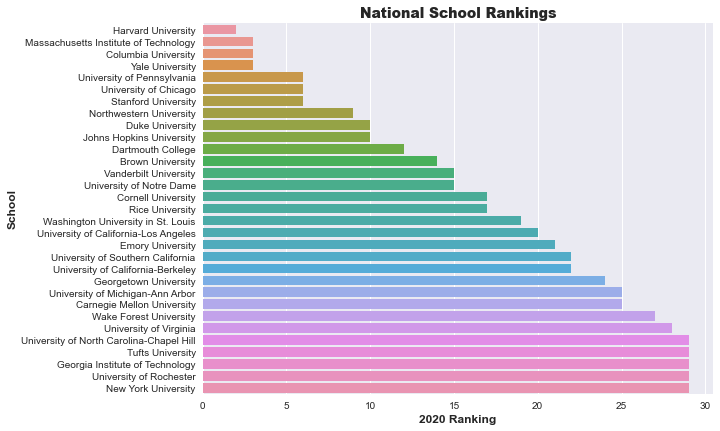

In [104]:
# min-max normalization:
def minmax_ratio(df, column):
    '''
    Returns a range of 0 to 1 for ratio (income to debt) column. 
        The closer to 1, the more positive the outcome. The closer to 0, the worst the outcome. Under 1.0 means more debt than income.
    :param df: field of study dataframe
    :param column: column of dataframe to calculate min/max ratio        
    '''
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# convert dtype from objects to numeric so we can do math
comparison_fos_data_pd['debt_all_stgp_eval_mdn'] = pd.to_numeric(comparison_fos_data_pd['debt_all_stgp_eval_mdn'], downcast='float', errors='coerce')
comparison_fos_data_pd['earn_mdn_hi_1yr'] = pd.to_numeric(comparison_fos_data_pd['earn_mdn_hi_1yr'], downcast='float', errors='coerce')

# calc income to debt ratio (over all fields of study for ML use)
# Median earnings of gradutes working and not enrolled after one year
comparison_fos_data_pd['ratio_yr1'] = comparison_fos_data_pd['earn_mdn_hi_1yr'] / comparison_fos_data_pd['debt_all_stgp_eval_mdn']
comparison_fos_data_pd["minmax_ratio_yr1"] = minmax_ratio(comparison_fos_data_pd, "ratio_yr1")

# National School Ranking chart
chart_figure, chart_axis = plt.subplots()
chart_figure.tight_layout()
chart_figure.set_size_inches(8,6)
plt.subplots_adjust(wspace=.9, hspace=.9)
chart=sns.barplot(ax=chart_axis, x='2020 Rank',y='University Name', data= comparison_fos_data_pd.sort_values(by=['2020 Rank']))
chart.set_title('National School Rankings', fontsize=fontinfo['headsize'], fontweight=fontinfo['headweight'])
chart.set_xlabel('2020 Ranking', fontsize=fontinfo['size'], fontweight=fontinfo['weight'])
_= chart.set_ylabel('School', fontsize=fontinfo['size'], fontweight=fontinfo['weight'])

### National School Income to Debt Charts
> * For each field of study, we created a `sns.barplot` of school to min/max income to debt ratio. This barplot allowed us to group schools by field of study to analyze income to debt ratio to analyze what university is the worst and best ROI. 
> * We decided to remove the ratio ticks at bottom of chart and replace them with the following 0 with "Worst ROI" and 1 with "Best ROI". We decided to do this in order to better understand our analysis from worst to best return of investment in regard to income to debt ratio analysis.

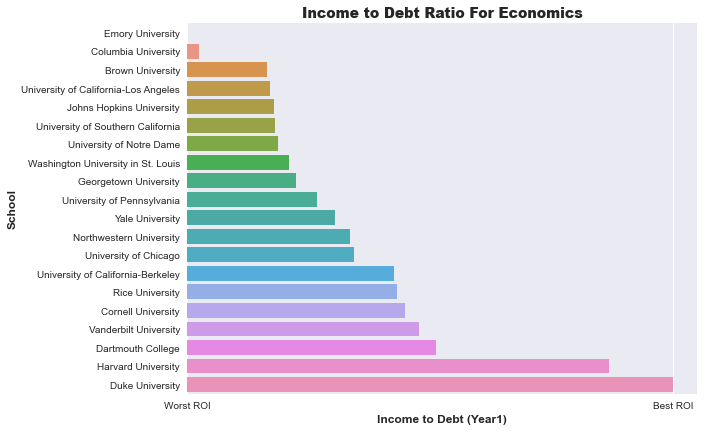

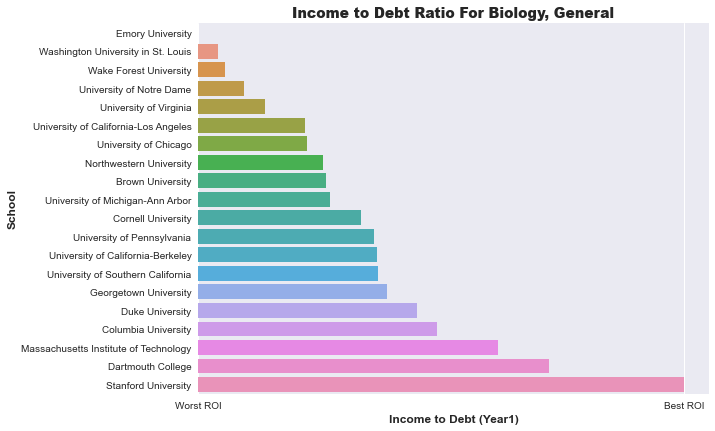

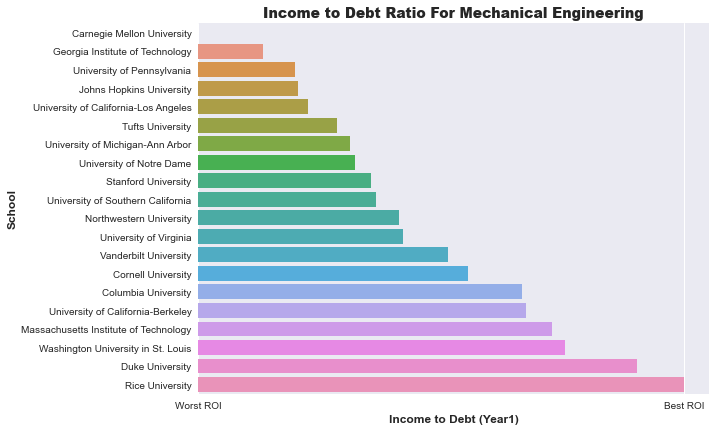

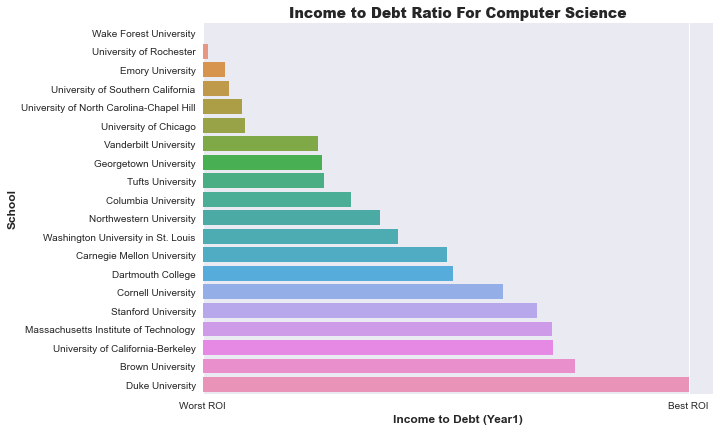

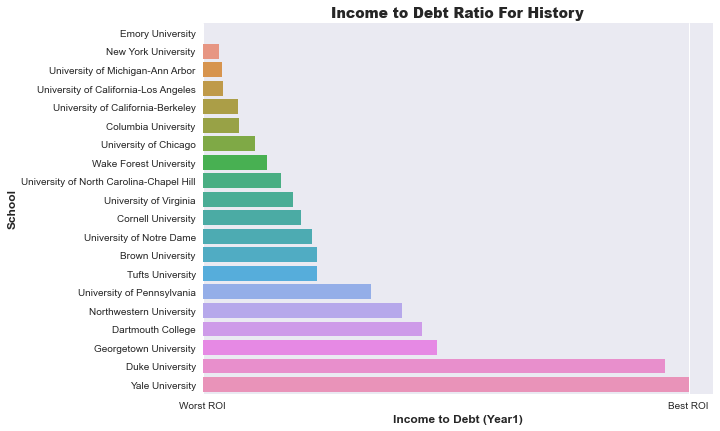

In [105]:
# National School Income to Debt charts
# Hiding Back Ticks - https://stackoverflow.com/questions/50820043/hiding-xticks-labels-every-n-th-label-or-on-value-on-pandas-plot-make-x-axis-r

for s in selected_fields_of_study:
    s_clean = (s.replace('.', ''))
    one_field_pd = comparison_fos_data_pd.loc[comparison_fos_data_pd['cipdesc'] == s]
    
    # calc income to debt ratio within this field of study
    # Median earnings of gradutes working and not enrolled after one year
    one_field_pd['ratio_yr1'] = one_field_pd['earn_mdn_hi_1yr'] / one_field_pd['debt_all_stgp_eval_mdn']
    one_field_pd['minmax_ratio_yr1_fos'] = minmax_ratio(one_field_pd, "ratio_yr1")
    comparison_fos_data_pd.loc[comparison_fos_data_pd['cipdesc'] == s, 'minmax_ratio_yr1_fos'] = one_field_pd

    ratio_figure, ratio_axis = plt.subplots()
    ratio_figure.tight_layout()
    ratio_figure.set_size_inches(8,6)
    plt.subplots_adjust(wspace=.9, hspace=.9)
    ticks = [0, one_field_pd['minmax_ratio_yr1_fos'].max()] # set only ticks first and last tick
    tick_labels = ['Worst ROI','Best ROI'] # set only ticks first and last tick table
    ratio_axis.set(xticks=ticks, xticklabels=tick_labels)
    chart=sns.barplot(ax=ratio_axis,x='minmax_ratio_yr1_fos',y='University Name', data= one_field_pd.sort_values(by=['minmax_ratio_yr1_fos']))
    chart.set_title(f'Income to Debt Ratio For {s_clean}', fontsize=fontinfo['headsize'], fontweight=fontinfo['headweight'])
    chart.set_xlabel('Income to Debt (Year1)', fontsize=fontinfo['size'], fontweight=fontinfo['weight'])
    _= chart.set_ylabel('School', fontsize=fontinfo['size'], fontweight=fontinfo['weight'])


In [106]:
comparison_fos_data_pd

,unitid,ope6_id,cipcode,cipdesc,credlev,creddesc,debt_all_stgp_eval_mdn,earn_mdn_hi_1yr,earn_mdn_hi_2yr,University Name,IPEDS ID,State,2020 Rank,ratio_yr1,minmax_ratio_yr1,minmax_ratio_yr1_fos
794,166027.0,2155,4506,Economics.,3,Bachelors Degree,9464.0,81333.0,78971,Harvard University,166027,MA,2.0,8.593935,0.698248,0.868611
1016,190150.0,2707,4506,Economics.,3,Bachelors Degree,27000.0,72710.0,79419,Columbia University,190150,NY,3.0,2.692963,0.163646,0.023907
315,130794.0,1426,4506,Economics.,3,Bachelors Degree,19500.0,90856.0,86621,Yale University,130794,CT,3.0,4.659282,0.341786,0.305379
1387,215062.0,3378,4506,Economics.,3,Bachelors Degree,19000.0,83446.0,77087,University of Pennsylvania,215062,PA,6.0,4.391895,0.317562,0.267103
562,144050.0,1774,4506,Economics.,3,Bachelors Degree,16999.0,83647.0,85637,University of Chicago,144050,IL,6.0,4.920701,0.365469,0.342800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,199847.0,2978,5401,History.,3,Bachelors Degree,17500.0,37568.0,41789,Wake Forest University,199847,NC,27.0,2.146743,0.114161,0.133029
1632,234076.0,3745,5401,History.,3,Bachelors Degree,19667.0,45383.0,40605,University of Virginia,234076,VA,28.0,2.307571,0.128731,0.186050
1220,199120.0,2974,5401,History.,3,Bachelors Degree,13736.0,30687.0,25525,University of North Carolina-Chapel Hill,199120,NC,29.0,2.234056,0.122071,0.161814
854,168148.0,2219,5401,History.,3,Bachelors Degree,19000.0,46673.0,39369,Tufts University,168148,MA,29.0,2.456474,0.142221,0.235140


### Results of National School Income to Debt Charts
> * Results show that each field of study varies but you recieve the best return of salary from your income to debt ratio when one pursues a degree in Computuer Science and or Mechanical Engineering and ranking of school does matter. 
> * Best ROI is seen on higher ranked schools such as Duke, Yale, Stanford, and Rice Univeristy. 
> * Please note all these institutions are deemed private. 

----
## Prediction Model
<!--

```
10 PTS
● What model did you use for making predictions or solving the problem
• Why did you select that model?
● How was the model trained
● Did you follow train, test and cross-validation protocols?
```
-->

> ###  Using Linear Regression Model to predict income to debt
> * Using a linear regression model we can predict the income to debt ratio for a given school’s rank.
> * Linear regression is a good model to use given we have 1 dependent variable (debt to earnings ratio) and 1 independent variable (school rank).
> * We decided to normalize the income to debt ratio over all fields of study instead of each specific field of study to provide a more conservative prediction model
> * We are using the Scikit-Learn (sklearn) train test split method to test and train data and are using a test set of 30% and a training set of 70%.
> * We chose the the split percentage of train: 70%, test: 30% since this seems to be a standard split percentage to use.
> * The `minmax_ratio_yr1` is a ratio of income to debt normalized over all fields of study.
> * The `minmax_ratio_yr1_fos` is a ratio of income to debt normalized over that the specific field of study this ratio came from. 
> * The `minmax_ratio_yr1`, when feed to the learning mdoel, seems to result in an overall better prediction of debt to income ratio vs school ranking.

### Model - Income to Debt Ratio vs School Rank for Several Fields of Study

> * Predict income to debt ratio for that field of study for  school rank


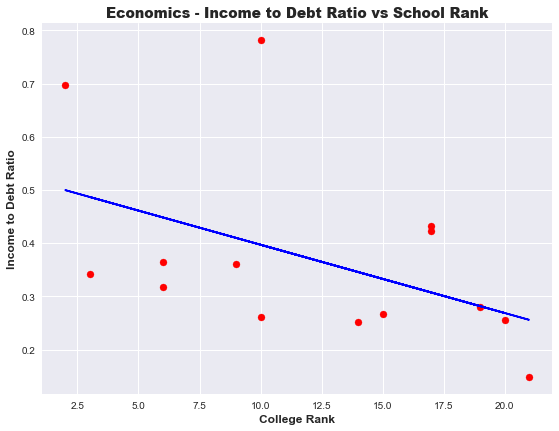

The predicted income to debt ratio for field of study Economics for school rank 24.0: predicted=0.22, actual=0.29
Coefficients:  [-0.01283031]
Mean squared error: 0.03
Coefficient of determination: -1.19




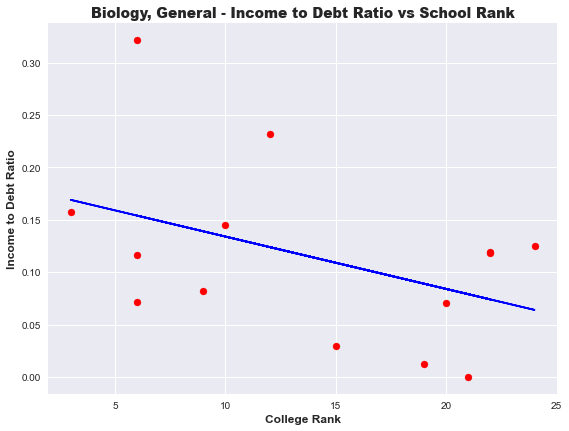

The predicted income to debt ratio for field of study Biology, General for school rank 28.0: predicted=0.04, actual=0.04
Coefficients:  [-0.00500198]
Mean squared error: 0.00
Coefficient of determination: 0.82




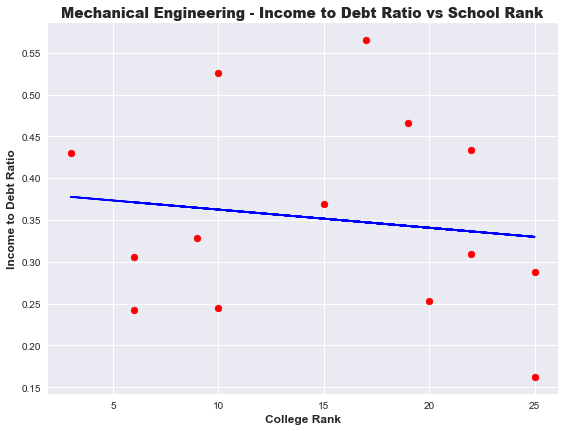

The predicted income to debt ratio for field of study Mechanical Engineering for school rank 29.0: predicted=0.32, actual=0.22
Coefficients:  [-0.00217508]
Mean squared error: 0.00
Coefficient of determination: 0.33




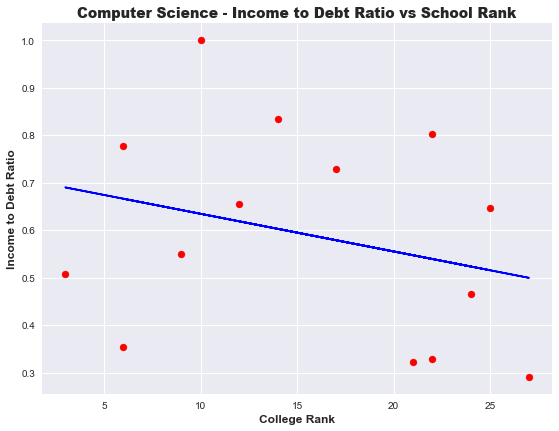

The predicted income to debt ratio for field of study Computer Science for school rank 29.0: predicted=0.48, actual=0.30
Coefficients:  [-0.0079396]
Mean squared error: 0.01
Coefficient of determination: 0.48




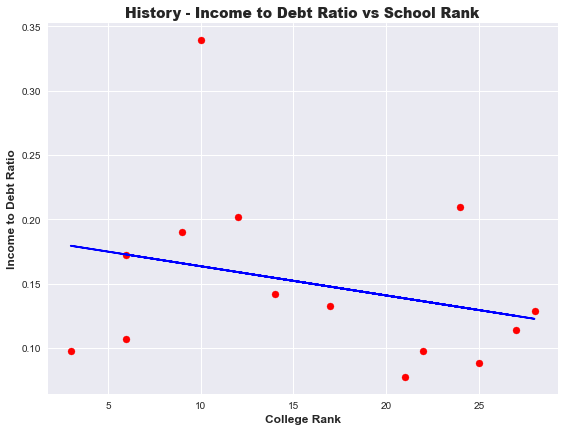

The predicted income to debt ratio for field of study History for school rank 29.0: predicted=0.12, actual=0.09
Coefficients:  [-0.00227138]
Mean squared error: 0.01
Coefficient of determination: 0.31




In [108]:
# import the top N schools combined dataset
# define variables for regression model 
# loop through the listed fields of study
from sklearn.metrics import mean_squared_error, r2_score

for fos in selected_fields_of_study:
    selected_fields_of_study_pd = comparison_fos_data_pd[comparison_fos_data_pd['cipdesc'] == fos]
    fos_clean = (fos.replace('.', ''))
    rank = selected_fields_of_study_pd.loc[:, ['2020 Rank']].values
    earnings = selected_fields_of_study_pd.loc[:, ['earn_mdn_hi_1yr']].values
    debt = selected_fields_of_study_pd.loc[:, ['debt_all_stgp_eval_mdn']].values
    ratio = selected_fields_of_study_pd.loc[:, ['minmax_ratio_yr1']].values
    rank2 = rank.reshape(-1,1)

    # using sklearn train test_split_method to test and train data, using test set of 30%, training set of 70%
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(rank2, ratio, test_size = 0.3, random_state = 0)

    # use scikit learn linear regression model
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Create the scatter plot with the line of best fit
    plot_figure, plot_axis = plt.subplots()
    plot_figure.tight_layout()
    plot_figure.set_size_inches(8,6)
    plt.subplots_adjust(wspace=.9, hspace=.9)

    plt.scatter(X_train, y_train, color = 'Red')
    plt.plot(X_train, model.predict(X_train), color = 'blue')
    plt.title( f'{fos_clean} - Income to Debt Ratio vs School Rank', fontsize=fontinfo['headsize'], fontweight=fontinfo['headweight'])
    plt.xlabel('College Rank', fontsize=fontinfo['size'], fontweight=fontinfo['weight'])
    plt.ylabel('Income to Debt Ratio', fontsize=fontinfo['size'], fontweight=fontinfo['weight'])
    plt.show()
    
    # what income to debt ratio can we predict from the last ranking school
    last_school = selected_fields_of_study_pd[-1:] 
    last_rank = last_school['2020 Rank'].values[0]
    predicted_ratio = model.predict([[last_rank]])[-1][-1]
    actual_ratio = last_school['minmax_ratio_yr1'].values[0]
    print('The predicted income to debt ratio for field of study {} for school rank {}: predicted={:.2f}, actual={:.2f}'.format(fos_clean, last_rank, predicted_ratio, actual_ratio))

    # The coefficients
    print('Coefficients: ',  model.coef_[0])
    
    # The mean squared error
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
    print('\n')


----
## Ethical Considerations
<!--
```
10 PTS
● What model did you use for making predictions or solving the problem
• Why did you select that model?
● How was the model trained
● Did you follow train, test and cross-validation protocols?
```
-->

> ### add Assignment details here ....

# Conclusion
```

20 PTS
● Have you annotated your notebook with clear explanations to walk the reader
through, step by step?
● Does your annotation communicate alternative paths considered in the analysis
and decisions made for why particular directions were chosen?
● Have you clearly stated the conclusion from your project? Justify them.
● What are future directions for the project were you to take more time and garner
additional datasets.
```